# How to convert a Tagtog project to Kili

## Setup

In [ ]:
%pip install kili rich

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from kili.client import Kili
from pathlib import Path
from rich import print_json
import pprint
from bs4 import BeautifulSoup
import json
import os

In [ ]:
kili = Kili()

/Users/jonasm/kili-python-sdk/src/kili/client.py:96: DeprecationWarning: Kili SDK will stop supporting Python 3.7 in July 2023. Please upgrade to Python 3.8 or higher.
  stacklevel=1,


## Get data

For this recipe, we will use data from the [Apartment reviews](https://tagtog.com/JaqenNLP/ApartmentReviews) project made by Jennifer D. Ames.

The dataset consists in guests' reviews of apartments/houses for short-term lodging and tourism-related activities.

The reviews have been obtained from Inside Airbnb.

Each review has been manually annotated in tagtog.

Let's download the project's data (you'll need to be logged in tagtog to do so) by clicking this [link](https://tagtog.com/JaqenNLP/ApartmentReviews/-downloads/dataset-as-anndoc).

Once the .zip file is downloaded, we can unzip it:

In [ ]:
!tar -xvf tagtog_ApartmentReviews.zip

x ApartmentReviews/plain.html/pool/a8Wus9Ave5EJ5V38LGmGOeO8ZMTm-text.plain.html
x ApartmentReviews/plain.html/pool/aVw3oWUq3vsAeBwmyqXTqW15QHm0-text.plain.html
x ApartmentReviews/plain.html/pool/a17Fq.yqQAyG00iT.SWHQQHfrbii-text.plain.html
x ApartmentReviews/plain.html/pool/avkJCm9Pd39.lq1eJ07uJCs5fuDO-text.plain.html
x ApartmentReviews/plain.html/pool/asoNpKvw_4cUsOhh1LaRmBummt24-text.plain.html
x ApartmentReviews/plain.html/pool/a9aynETGolCx_JTJnRHMQ1lbeyUy-text.plain.html
x ApartmentReviews/ann.json/master/pool/avkJCm9Pd39.lq1eJ07uJCs5fuDO-text.ann.json
x ApartmentReviews/plain.html/pool/aAeiuwXUsrzSHQ2Rb4wdHhKEmTTe-text.plain.html
x ApartmentReviews/ann.json/master/pool/asoNpKvw_4cUsOhh1LaRmBummt24-text.ann.json
x ApartmentReviews/ann.json/master/pool/a8Wus9Ave5EJ5V38LGmGOeO8ZMTm-text.ann.json
x ApartmentReviews/ann.json/master/pool/aVw3oWUq3vsAeBwmyqXTqW15QHm0-text.ann.json
x ApartmentReviews/ann.json/master/pool/a9aynETGolCx_JTJnRHMQ1lbeyUy-text.ann.json
x ApartmentReviews/ann.js

In [ ]:
print(Path("ApartmentReviews/README.md").read_text(encoding="utf-8"))

This dataset lives in: https://tagtog.com/JaqenNLP/ApartmentReviews

This zip was generated with:
  * date: _2023-05-10T11:25:54.902Z_
  * search: `*`
  * total found documents: **228**

The dataset is here written in the [anndoc format](https://docs.tagtog.com/anndoc.html). Use the `annotations-legend.json` file to help you interpret the annotations.


What great things will you do with the dataset? :-) Enjoy!



Let's take a look at the ontology:

In [ ]:
tagtog_class_id_to_class_name = json.loads(
    Path("ApartmentReviews/annotations-legend.json").read_text(encoding="utf-8")
)
pprint.pprint(tagtog_class_id_to_class_name)

{'e_1': 'Loyalty',
 'e_13': 'TechOpinion',
 'e_14': 'FoodOpinion',
 'e_2': 'RoomOpinion',
 'e_4': 'ApartmentOpinion',
 'e_5': 'Location',
 'e_6': 'KitchenOpinion',
 'e_7': 'BathroomOpinion',
 'e_8': 'HostOpinion',
 'e_9': 'PricePayment',
 'f_10': 'RoomItem',
 'f_11': 'OutdoorFeature',
 'f_12': 'BathroomFeature',
 'f_15': 'TechFeature',
 'f_16': 'FoodFeature',
 'f_17': 'LocationFeature',
 'f_19': 'LoyaltyFeature',
 'f_20': 'ApartmentFeature',
 'f_21': 'HostCharacter',
 'f_22': 'isLocationQuiet',
 'f_23': 'Sentiment',
 'f_24': 'isCriticalProblem',
 'f_25': 'KitchenFeature',
 'f_26': 'PaymentFeature',
 'm_18': 'Sentiment'}


The ontology shows 10 entity types (keys starting with `e_`), 1 document label (key starting with `m_`), and 14 entity labels (keys starting with `f_`).

An entity label is used to tag an entity type, and aims at giving more information about the entity being annotated. For example, the `"f_17": "LocationFeature"` label can be used to tag a `"e_5": "Location"` entity type.

Read more about the ontology [here](https://tagtog.com/JaqenNLP/ApartmentReviews/-settings).

The `plain.html/pool` folder contains the reviews in HTML format:

In [ ]:
print(
    Path("ApartmentReviews/plain.html/pool/a.km05GoV2Uh1mw9QR.UNiNXWUL8-text.plain.html").read_text(
        encoding="utf-8"
    )
)

<!DOCTYPE html >
<html id="a.km05GoV2Uh1mw9QR.UNiNXWUL8-text" data-origid="text" class="anndoc" data-anndoc-version="3.6" lang="" xml:lang="" xmlns="http://www.w3.org/1999/xhtml">
  <head>
    <meta charset="UTF-8"/>
    <meta name="generator" content="net.tagtog.anndoc.v3.parsers.general.PlainTextParser_NewParagraphAfter1Newline_v2_0_0"/>
    <title>a.km05GoV2Uh1mw9QR.UNiNXWUL8-text</title>
  </head>
  <body>
    <article>
      <section data-type="">
        <div class="content">
          <p id="s1p1">The house is beautiful, but it is next to 2 very busy roads. There are no aircons in any rooms and to open the windows you hear the cars and trucks pass - very loud. There is no braai facilities and when we asked x 2 we were told the owner had to approve... still waiting! The rooms on the lower floor is empty and depressing, very hot! Kids slept on couches with sliding doors open, so we could not arm the alarm at night. The aircons on the upper level leaks water onto table and electric

The annotations are stored in the folder `ann.json/master/pool`:

In [ ]:
print_json(
    Path(
        "ApartmentReviews/ann.json/master/pool/a.km05GoV2Uh1mw9QR.UNiNXWUL8-text.ann.json"
    ).read_text(encoding="utf-8")
)

{
  "annotatable": {
    "parts": [
      "s1p1"
    ]
  },
  "anncomplete": true,
  "sources": [],
  "metas": {
    "m_18": {
      "value": "negative",
      "confidence": {
        "state": "pre-added",
        "who": [
          "user:Mrdenho"
        ],
        "prob": 1
      }
    }
  },
  "entities": [
    {
      "classId": "e_4",
      "part": "s1p1",
      "offsets": [
        {
          "start": 0,
          "text": "The house is beautiful"
        }
      ],
      "coordinates": [],
      "confidence": {
        "state": "pre-added",
        "who": [
          "user:Mrdenho"
        ],
        "prob": 1
      },
      "fields": {
        "f_23": {
          "value": "positive",
          "confidence": {
            "state": "pre-added",
            "who": [
              "user:Mrdenho"
            ],
            "prob": 1
          }
        }
      },
      "normalizations": {}
    },
    {
      "classId": "e_5",
      "part": "s1p1",
      "offsets": [
        {
          "start": 24,
          "text": "but it is next to 2 very busy roads"
        }
      ],
      "coordinates": [],
      "confidence": {
        "state": "pre-added",
        "who": [
          "user:Mrdenho"
        ],
        "prob": 1
      },
      "fields": {
        "f_24": {
          "value": true,
          "confidence": {
            "state": "pre-added",
            "who": [
              "user:Mrdenho"
            ],
            "prob": 1
          }
        },
        "f_22": {
          "value": false,
          "confidence": {
            "state": "pre-added",
            "who": [
              "user:Mrdenho"
            ],
            "prob": 1
          }
        },
        "f_23": {
          "value": "negative",
          "confidence": {
            "state": "pre-added",
            "who": [
              "user:Mrdenho"
            ],
            "prob": 1
          }
        }
      },
      "normalizations": {}
    },
    {
      "classId": "e_4",
      "part": "s1p1",
      "offsets": [
        {
          "start": 61,
          "text": "There are no aircons in any rooms"
        }
      ],
      "coordinates": [],
      "confidence": {
        "state": "pre-added",
        "who": [
          "user:Mrdenho"
        ],
        "prob": 1
      },
      "fields": {
        "f_20": {
          "value": "climate",
          "confidence": {
            "state": "pre-added",
            "who": [
              "user:Mrdenho"
            ],
            "prob": 1
          }
        },
        "f_24": {
          "value": true,
          "confidence": {
            "state": "pre-added",
            "who": [
              "user:Mrdenho"
            ],
            "prob": 1
          }
        },
        "f_23": {
          "value": "negative",
          "confidence": {
            "state": "pre-added",
            "who": [
              "user:Mrdenho"
            ],
            "prob": 1
          }
        }
      },
      "normalizations": {}
    },
    {
      "classId": "e_5",
      "part": "s1p1",
      "offsets": [
        {
          "start": 61,
          "text": "There are no aircons in any rooms and to open the windows you hear the cars and trucks pass - very loud"
        }
      ],
      "coordinates": [],
      "confidence": {
        "state": "pre-added",
        "who": [
          "user:Mrdenho"
        ],
        "prob": 1
      },
      "fields": {
        "f_23": {
          "value": "negative",
          "confidence": {
            "state": "pre-added",
            "who": [
              "user:Mrdenho"
            ],
            "prob": 1
          }
        },
        "f_22": {
          "value": false,
          "confidence": {
            "state": "pre-added",
            "who": [
              "user:Mrdenho"
            ],
            "prob": 1
          }
        },
        "f_24": {
          "value": true,
          "confidence": {
            "state": "pre-added",
            "who": [
              "user:Mr

## Create the Kili project

We can start creating the Named Entity Recognition (NER) Kili project.

To do so, we will need to define a json interface using the `annotations-legend.json` file.

The json interface is created directly from the [Kili UI](https://docs.kili-technology.com/docs/customizing-project-interface).

In [ ]:
json_interface = {
    "jobs": {
        "SENTIMENT_CLASSIFICATTION_JOB": {
            "content": {
                "categories": {
                    "positive": {"children": [], "name": "positive"},
                    "neutral": {"children": [], "name": "neutral"},
                    "negative": {"children": [], "name": "negative"},
                },
                "input": "radio",
            },
            "instruction": "Sentiment",
            "mlTask": "CLASSIFICATION",
            "required": 0,
            "isChild": False,
        },
        "NAMED_ENTITIES_RECOGNITION_JOB": {
            "content": {
                "categories": {
                    "HostOpinion": {
                        "children": [
                            "isCriticalProblem",
                            "HostCharacter",
                            "Sentiment",
                        ],
                        "color": "#472CED",
                        "name": "HostOpinion",
                    },
                    "RoomOpinion": {
                        "children": [
                            "isCriticalProblem",
                            "RoomItem",
                            "Sentiment",
                        ],
                        "name": "RoomOpinion",
                        "color": "#5CE7B7",
                    },
                    "BathroomOpinion": {
                        "children": [
                            "isCriticalProblem",
                            "Sentiment",
                            "BathroomFeature",
                        ],
                        "name": "BathroomOpinion",
                        "color": "#D33BCE",
                    },
                    "FoodOpinion": {
                        "children": [
                            "isCriticalProblem",
                            "FoodFeature",
                            "Sentiment",
                        ],
                        "name": "FoodOpinion",
                        "color": "#FB753C",
                    },
                    "Location": {
                        "children": [
                            "LocationFeature",
                            "isCriticalProblem",
                            "Sentiment",
                            "isLocationQuiet",
                        ],
                        "name": "Location",
                        "color": "#3BCADB",
                    },
                    "KitchenOpinion": {
                        "children": [
                            "isCriticalProblem",
                            "Sentiment",
                            "KitchenFeature",
                        ],
                        "name": "KitchenOpinion",
                        "color": "#199CFC",
                    },
                    "PricePayment": {
                        "children": [
                            "isCriticalProblem",
                            "Sentiment",
                            "PaymentFeature",
                        ],
                        "name": "PricePayment",
                        "color": "#FA484A",
                    },
                    "ApartmentOpinion": {
                        "children": [
                            "isCriticalProblem",
                            "ApartmentFeature",
                            "Sentiment",
                            "KitchenFeature",
                        ],
                        "name": "ApartmentOpinion",
                        "color": "#ECB82A",
                    },
                    "Loyalty": {
                        "children": [
                            "isCriticalProblem",
                            "LoyaltyFeature",
                            "Sentiment",
                        ],
                        "name": "Loyalty",
                        "color": "#3CD876",
                    },
                    "TechOpinion": {
                        "children": [
                            "isCriticalProblem",
                            "Sentiment",
                            "TechFeature",
                        ],
                        "name": "TechOpinion",
                        "color": "#733AFB",
                    },
                },
                "input": "radio",
            },
            "instruction": "Entity type",
            "mlTask": "NAMED_ENTITIES_RECOGNITION",
            "required": 1,
            "isChild": False,
        },
        "LocationFeature": {
            "content": {
                "categories": {
                    "center": {"children": [], "name": "center"},
                    "airport": {"children": [], "name": "airport"},
                    "underground": {"children": [], "name": "underground"},
                    "tram": {"children": [], "name": "tram"},
                    "bus": {"children": [], "name": "bus"},
                    "train": {"children": [], "name": "train"},
                    "highway": {"children": [], "name": "highway"},
                    "parking": {"children": [], "name": "parking"},
                    "shopping": {"children": [], "name": "shopping"},
                    "tourism": {"children": [], "name": "tourism"},
                    "restaurants": {"children": [], "name": "restaurants"},
                    "pubs": {"children": [], "name": "pubs"},
                    "nature": {"children": [], "name": "nature"},
                    "arrival": {"children": [], "name": "arrival"},
                    "safety": {"children": [], "name": "safety"},
                    "ownvehicle": {"children": [], "name": "ownvehicle"},
                    "taxi": {"children": [], "name": "taxi"},
                },
                "input": "checkbox",
            },
            "instruction": "LocationFeature",
            "mlTask": "CLASSIFICATION",
            "required": 0,
            "isChild": True,
        },
        "isCriticalProblem": {
            "content": {
                "categories": {
                    "yes": {"children": [], "name": "yes"},
                    "no": {"children": [], "name": "no"},
                },
                "input": "radio",
            },
            "instruction": "isCriticalProblem",
            "mlTask": "CLASSIFICATION",
            "required": 0,
            "isChild": True,
        },
        "ApartmentFeature": {
            "content": {
                "categories": {
                    "cleanliness": {"children": [], "name": "cleanliness"},
                    "stairs": {"children": [], "name": "stairs"},
                    "compliantDescription": {"children": [], "name": "compliantDescription"},
                    "look": {"children": [], "name": "look"},
                    "space": {"children": [], "name": "space"},
                    "climate": {"children": [], "name": "climate"},
                    "pets": {"children": [], "name": "pets"},
                    "gym": {"children": [], "name": "gym"},
                    "safety": {"children": [], "name": "safety"},
                },
                "input": "checkbox",
            },
            "instruction": "ApartmentFeature",
            "mlTask": "CLASSIFICATION",
            "required": 0,
            "isChild": True,
        },
        "FoodFeature": {
            "content": {
                "categories": {
                    "breakfast": {"children": [], "name": "breakfast"},
                    "drinks": {"children": [], "name": "drinks"},
                    "snacks": {"children": [], "name": "snacks"},
                },
                "input": "checkbox",
            },
            "instruction": "FoodFeature",
            "mlTask": "CLASSIFICATION",
            "required": 0,
            "isChild": True,
        },
        "LoyaltyFeature": {
            "content": {
                "categories": {
                    "solo": {"children": [], "name": "solo"},
                    "couples": {"children": [], "name": "couples"},
                    "family": {"children": [], "name": "family"},
                    "friends": {"children": [], "name": "friends"},
                    "repeat": {"children": [], "name": "repeat"},
                },
                "input": "checkbox",
            },
            "instruction": "LoyaltyFeature",
            "mlTask": "CLASSIFICATION",
            "required": 0,
            "isChild": True,
        },
        "HostCharacter": {
            "content": {
                "categories": {
                    "friendliness": {"children": [], "name": "friendliness"},
                    "politeness": {"children": [], "name": "politeness"},
                    "communication": {"children": [], "name": "communication"},
                },
                "input": "checkbox",
            },
            "instruction": "HostCharacter",
            "mlTask": "CLASSIFICATION",
            "required": 0,
            "isChild": True,
        },
        "RoomItem": {
            "content": {
                "categories": {
                    "bed": {"children": [], "name": "bed"},
                    "wardrobe": {"children": [], "name": "wardrobe"},
                    "chair": {"children": [], "name": "chair"},
                    "desk": {"children": [], "name": "desk"},
                },
                "input": "checkbox",
            },
            "instruction": "RoomItem",
            "mlTask": "CLASSIFICATION",
            "required": 0,
            "isChild": True,
        },
        "Sentiment": {
            "content": {
                "categories": {
                    "positive": {"children": [], "name": "positive"},
                    "negative": {"children": [], "name": "negative"},
                },
                "input": "radio",
            },
            "instruction": "Sentiment",
            "mlTask": "CLASSIFICATION",
            "required": 0,
            "isChild": True,
        },
        "TechFeature": {
            "content": {
                "categories": {
                    "wifi": {"children": [], "name": "wifi"},
                    "keypad": {"children": [], "name": "keypad"},
                    "smarthome": {"children": [], "name": "smarthome"},
                    "mobile": {"children": [], "name": "mobile"},
                    "tv": {"children": [], "name": "tv"},
                    "videogames": {"children": [], "name": "videogames"},
                },
                "input": "checkbox",
            },
            "instruction": "TechFeature",
            "mlTask": "CLASSIFICATION",
            "required": 0,
            "isChild": True,
        },
        "BathroomFeature": {
            "content": {
                "categories": {
                    "shower": {"children": [], "name": "shower"},
                    "bathtub": {"children": [], "name": "bathtub"},
                    "wc": {"children": [], "name": "wc"},
                    "amenities": {"children": [], "name": "amenities"},
                    "hairdryer": {"children": [], "name": "hairdryer"},
                },
                "input": "checkbox",
            },
            "instruction": "BathroomFeature",
            "mlTask": "CLASSIFICATION",
            "required": 0,
            "isChild": True,
        },
        "PaymentFeature": {
            "content": {
                "categories": {
                    "refund": {"children": [], "name": "refund"},
                    "deposit": {"children": [], "name": "deposit"},
                    "payment_methods": {"children": [], "name": "payment methods"},
                    "extra_charges": {"children": [], "name": "extra charges"},
                },
                "input": "checkbox",
            },
            "instruction": "PaymentFeature",
            "mlTask": "CLASSIFICATION",
            "required": 0,
            "isChild": True,
        },
        "isLocationQuiet": {
            "content": {
                "categories": {
                    "Quiet": {"children": [], "name": "Quiet"},
                    "Noisy": {"children": [], "name": "Noisy"},
                },
                "input": "radio",
            },
            "instruction": "isLocationQuiet",
            "mlTask": "CLASSIFICATION",
            "required": 0,
            "isChild": True,
        },
        "OutdoorFeature": {
            "content": {
                "categories": {
                    "garden": {"children": [], "name": "garden"},
                    "patio": {"children": [], "name": "patio"},
                    "balcon": {"children": [], "name": "balcon"},
                    "terrace": {"children": [], "name": "terrace"},
                    "view": {"children": [], "name": "view"},
                    "pool": {"children": [], "name": "pool"},
                    "barbecue": {"children": [], "name": "barbecue"},
                },
                "input": "checkbox",
            },
            "instruction": "OutdoorFeature",
            "mlTask": "CLASSIFICATION",
            "required": 0,
            "isChild": True,
        },
        "KitchenFeature": {
            "content": {
                "categories": {"appliances": {"children": [], "name": "appliances"}},
                "input": "checkbox",
            },
            "instruction": "KitchenFeature",
            "mlTask": "CLASSIFICATION",
            "required": 0,
            "isChild": True,
        },
    }
}

In [ ]:
project_id = kili.create_project(
    input_type="TEXT", json_interface=json_interface, title="Tagto to Kili recipe"
)["id"]

In the Kili project created, we can see the ontology that follows the same structure as the one in tagtog:

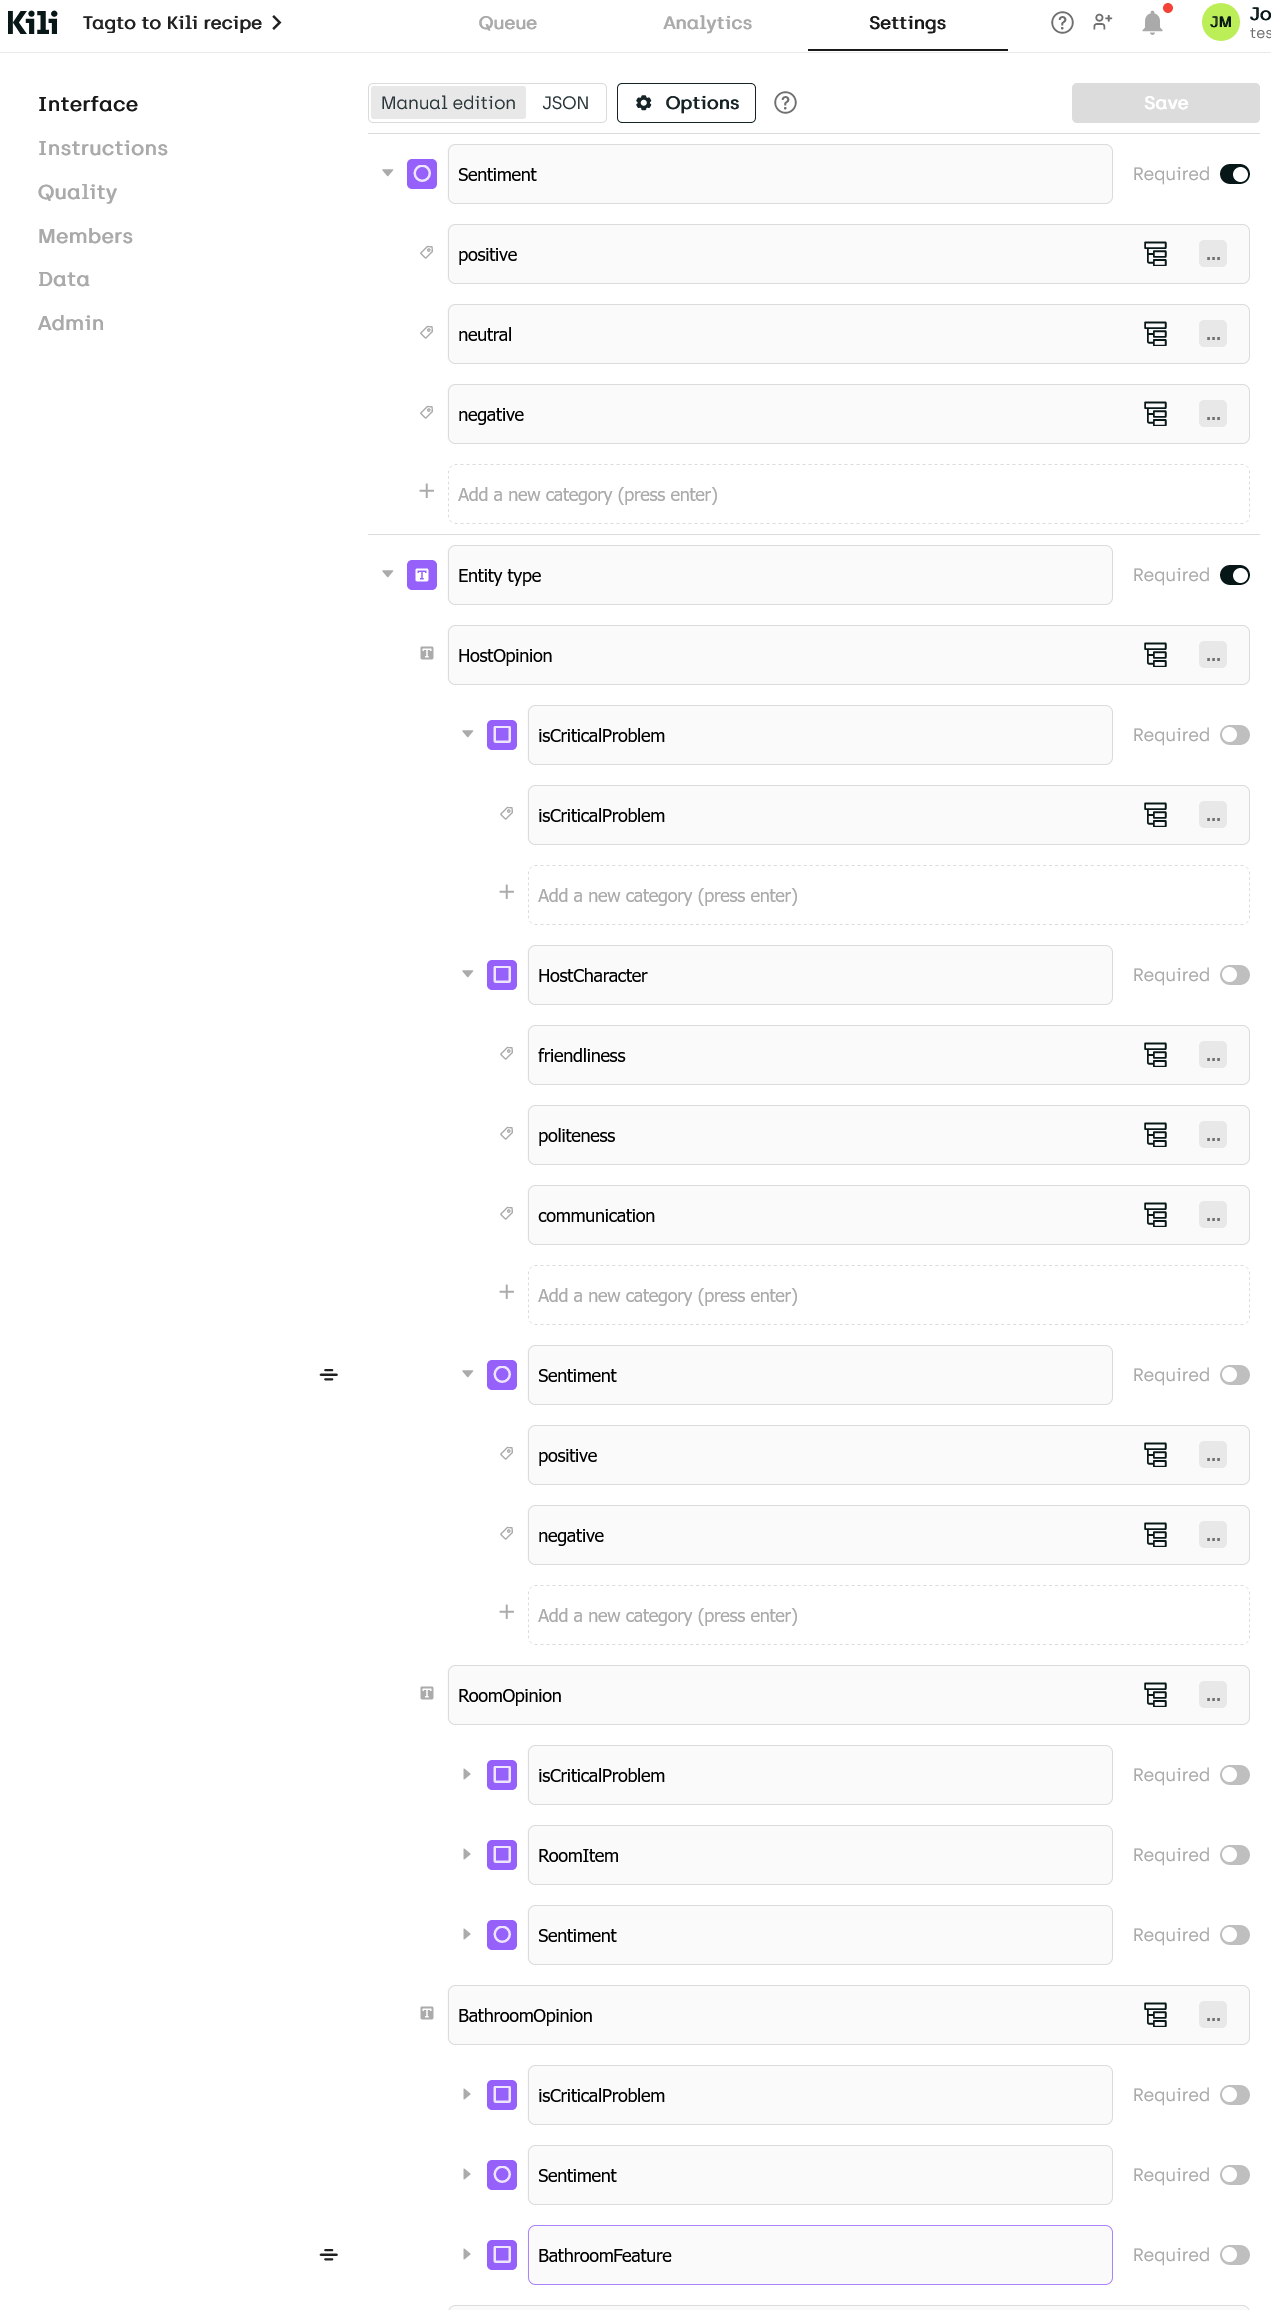

## Upload assets

Now that the project is created, we can upload our assets.

In [ ]:
filepaths = [
    Path("ApartmentReviews/plain.html/pool/") / filepath
    for filepath in os.listdir("ApartmentReviews/plain.html/pool/")
]
print(len(filepaths))

228


In [ ]:
external_ids = [filepath.name.replace(".plain.html", "") for filepath in filepaths]
assets = [
    BeautifulSoup(file.read_text(encoding="utf-8"), "html.parser").find("body").get_text().strip()
    for file in filepaths
]

In [ ]:
print(external_ids[0])
print(assets[0])

aKRwFKFHhO5FoLBBCEUJl8gkQoBS-text
Jason was great! He welcomed us with cold waters and fully explained the apartment and its many amenities. He provided anything we could have forgotten and made sure to answer the many questions we had. He was quick to answer any additional questions throughout the stay as well. The apartment is located on a quiet hutong right off a main street that is right in the center of the old town and is just a short walk to the metro. The shower is a bit hard to get in and out of, and would be difficult if you have mobility issues. But the apartment was great and we really enjoyed a little bit of local living while in Beijing. Thanks Jason!


We can now upload those assets to our Kili project:

In [ ]:
kili.append_many_to_dataset(project_id, content_array=assets, external_id_array=external_ids)

100%|██████████| 228/228 [00:24<00:00,  9.45it/s]


{'id': 'clhhs69zu00050j7ggkd334lj'}

Our assets have been successfully uploaded to Kili:

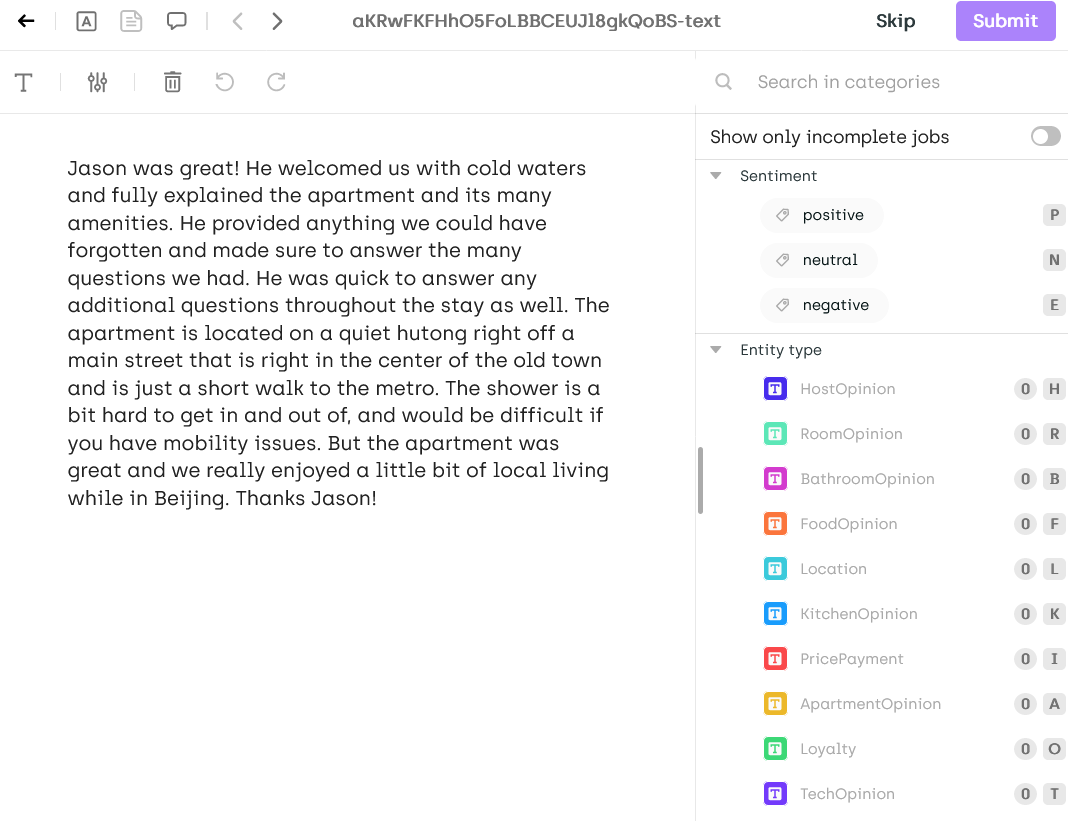

## Upload existing annotations

Now that our project is created and our assets uploaded, we can upload the annotations we made in tagtog.

But first, we need to convert the tagtog annotations to the Kili format.

In [ ]:
json_response_array = []

for asset_name, asset in zip(external_ids, assets):
    # load the tagtog json annotation
    annotation_path = Path("ApartmentReviews/ann.json/master/pool/") / (asset_name + ".ann.json")
    tagtog_annotation = json.loads(annotation_path.read_text(encoding="utf-8"))

    # skip if not annotated
    if not tagtog_annotation["anncomplete"]:
        continue

    # kili json response
    json_response = {}

    # overall review sentiment classification
    try:
        sentiment_class = tagtog_annotation["metas"]["m_18"]["value"]
    except KeyError:
        pass  # the asset is not annotated for sentiment
    else:
        assert sentiment_class in ("positive", "negative", "neutral"), sentiment_class
        sentiment_confidence = int(
            round(tagtog_annotation["metas"]["m_18"]["confidence"]["prob"] * 100)
        )

        # we add the sentiment classification to the json response
        json_response["SENTIMENT_CLASSIFICATTION_JOB"] = {}
        json_response["SENTIMENT_CLASSIFICATTION_JOB"]["categories"] = [
            {"name": sentiment_class, "confidence": sentiment_confidence}
        ]

    if len(tagtog_annotation["annotatable"]["parts"]) > 1:
        json_response_array.append(json_response)
        continue  # TODO: multiple parts assets

    # Named entities recognition
    json_response["NAMED_ENTITIES_RECOGNITION_JOB"] = {"annotations": []}
    for entity in tagtog_annotation["entities"]:
        ner_class = tagtog_class_id_to_class_name[entity["classId"]]

        # make sure the class is in the json interface
        assert (
            ner_class
            in json_interface["jobs"]["NAMED_ENTITIES_RECOGNITION_JOB"]["content"]["categories"]
        ), ner_class

        confidence = int(round(entity["confidence"]["prob"] * 100))

        # get the begin offset and the content of the entity
        assert len(entity["offsets"]) == 1, entity["offsets"]
        begin_offset = entity["offsets"][0]["start"]
        content = entity["offsets"][0]["text"]
        assert content == asset[begin_offset : begin_offset + len(content)], (
            content,
            asset[begin_offset : begin_offset + len(content)],
        )

        entity_annotation = {
            "children": {},
            "beginOffset": begin_offset,
            "categories": [{"name": ner_class, "confidence": confidence}],
            "content": content,
        }

        for field_id in entity["fields"]:
            entity_label = tagtog_class_id_to_class_name[field_id]
            job_interface = json_interface["jobs"][entity_label]
            confidence = int(round(entity["fields"][field_id]["confidence"]["prob"] * 100))
            label_class = entity["fields"][field_id]["value"]

            if entity_label == "isLocationQuiet":
                label_class = "Quiet" if label_class else "Noisy"

            if entity_label == "isCriticalProblem":
                label_class = "yes" if label_class else "no"

            if entity_label == "HostCharacter" and label_class == "friendly":
                label_class = "friendliness"

            label_class = label_class.replace(" ", "_")
            assert label_class in job_interface["content"]["categories"], f"{label_class} {entity}"

            if entity_label not in entity_annotation["children"]:
                entity_annotation["children"][entity_label] = {"categories": []}

            entity_annotation["children"][entity_label]["categories"].append(
                {"name": label_class, "confidence": confidence}
            )

        json_response["NAMED_ENTITIES_RECOGNITION_JOB"]["annotations"].append(entity_annotation)

    json_response_array.append(json_response)

We can now upload the Kili annotations to our project:

In [ ]:
kili.append_labels(
    json_response_array=json_response_array[:5],
    project_id=project_id,
    asset_external_id_array=external_ids[:5],
)

NameError: name 'project_id' is not defined